### Load Functions

In [1]:
import pandas as pd

from simple_trade import download_data, compute_indicator
from simple_trade import BandTradeBacktester
from simple_trade import BacktestPlotter

# Set pandas display options for better output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Backtest with Bollinger Bands

In [2]:
# Step 1: Download data
symbol = 'GOOG'
start = '2024-01-01'
interval = '1d'
initial_cash = 10000.0
commission = 0.001
data = download_data(symbol, start, interval=interval)

# Step 2: Calculate Bollinger Bands (using default window=20, std_dev=2)
data = compute_indicator(data=data, indicator='bollin')
data.head(5)

Computing BOLLIN...


,Adj Close,Close,High,Low,Open,Volume,BB_Middle_20,BB_Upper_20_2,BB_Lower_20_2
Date,,,,,,,,,
2024-01-02,138.902100,139.559998,140.615005,137.740005,139.600006,20071900,NaN,NaN,NaN
2024-01-03,139.698334,140.360001,141.089996,138.429993,138.600006,18974300,NaN,NaN,NaN
2024-01-04,137.389252,138.039993,140.634995,138.009995,139.850006,18253300,NaN,NaN,NaN
2024-01-05,136.742325,137.389999,138.809998,136.850006,138.352005,15433200,NaN,NaN,NaN
2024-01-08,139.867523,140.529999,140.639999,137.880005,138.000000,17645300,NaN,NaN,NaN


In [3]:
backtester = BandTradeBacktester(initial_cash=initial_cash, commission=commission)
results, portfolio = backtester.run_band_trade(
    data=data,
    indicator_col='Close',
    upper_band_col='BB_Upper_20_2',
    lower_band_col='BB_Middle_20',
    price_col='Close',
    trading_type='long',
    long_entry_pct_cash=1,
    strategy_type=2,
)

# --- Results ---
backtester.print_results(results)


✨ Band Trade (Close vs BB_Middle_20/BB_Upper_20_2 - Breakout) ✨

🗓️ BACKTEST PERIOD:
  • Period: 2024-01-30 to 2025-05-02
  • Duration: 458 days
  • Trading Days: 316

📊 BASIC METRICS:
  • Initial Investment: $10,000.00
  • Final Portfolio Value: $9,922.57
  • Total Return: -0.77%
  • Annualized Return: -0.62%
  • Number of Trades: 10
  • Total Commissions: $107.67

📈 BENCHMARK COMPARISON:
  • Benchmark Return: 18.69%
  • Benchmark Final Value: $11,869.04
  • Strategy vs Benchmark: -19.46%

📉 RISK METRICS:
  • Sharpe Ratio: 0.050
  • Sortino Ratio: -0.030
  • Maximum Drawdown: -18.47%
  • Average Drawdown: -9.65%
  • Max Drawdown Duration: 295 days
  • Avg Drawdown Duration: 38.1 days
  • Annualized Volatility: 17.52%



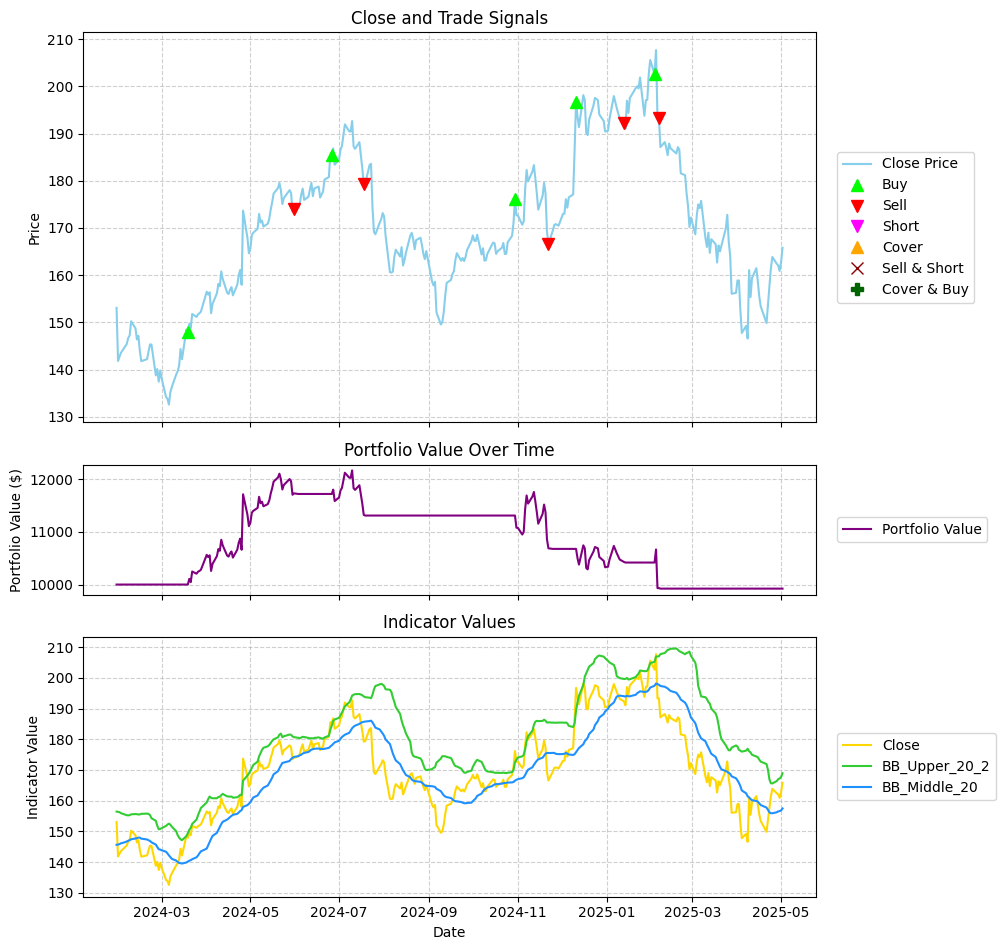

In [4]:
# Prepare results for plotting
plotter = BacktestPlotter()

# Define the indicator columns explicitly
indicator_cols_to_plot = ['Close', 'BB_Upper_20_2', 'BB_Middle_20']

fig = plotter.plot_results(
    data_df=data,
    history_df=portfolio,
    price_col='Close',
    indicator_cols=indicator_cols_to_plot, 
    title=f"Bollinger Bands (Long Only) (BB-20 BB_Upper_20_2/BB_Middle_20)"
)